In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import r_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [100]:
df = pd.read_csv('clean_df.csv', index_col=0)
df.head()

,year,name,age,games_played,games_started,minutes_played,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,hall_of_fame,height,weight,year_born,year_start,year_end,month_born,day_born,birth_state_Alabama,birth_state_Alaska,birth_state_Argentina,birth_state_Arizona,birth_state_Arkansas,birth_state_Australia,birth_state_Austria,birth_state_Bahamas,birth_state_Belgium,birth_state_Bosnia and Herzegovina,birth_state_Brazil,birth_state_Bulgaria,birth_state_California,birth_state_Cameroon,birth_state_Canada,birth_state_Cape Verde,birth_state_China,birth_state_Colorado,birth_state_Connecticut,birth_state_Croatia,birth_state_Cuba,birth_state_Czech Republic,birth_state_Delaware,birth_state_Democratic Republic of the Congo,birth_state_Denmark,birth_state_District of Columbia,birth_state_Dominica,birth_state_Dominican Republic,birth_state_Egypt,birth_state_Estonia,birth_state_FYR Macedonia,birth_state_Finland,birth_state_Florida,birth_state_France,birth_state_French Guiana,birth_state_Gabon,birth_state_Georgia,birth_state_Germany,birth_state_Ghana,birth_state_Greece,birth_state_Guadeloupe,birth_state_Guyana,birth_state_Haiti,birth_state_Hawaii,birth_state_Hungary,birth_state_Iceland,birth_state_Idaho,birth_state_Illinois,birth_state_Indiana,birth_state_Iowa,birth_state_Ireland,birth_state_Islamic Republic of Iran,birth_state_Israel,birth_state_Italy,birth_state_Jamaica,birth_state_Japan,birth_state_Kansas,birth_state_Kentucky,birth_state_Latvia,birth_state_Lebanon,birth_state_Lithuania,birth_state_Louisiana,birth_state_Luxembourg,birth_state_Maine,birth_state_Mali,birth_state_Martinique,birth_state_Maryland,birth_state_Massachusetts,birth_state_Mexico,birth_state_Michigan,birth_state_Minnesota,birth_state_Mississippi,birth_state_Missouri,birth_state_Montana,birth_state_Montenegro,birth_state_Morocco,birth_state_Nebraska,birth_state_Netherlands,birth_state_Nevada,birth_state_New Hampshire,birth_state_New Jersey,birth_state_New Mexico,birth_state_New York,birth_state_New Zealand,birth_state_Nigeria,birth_state_North Carolina,birth_state_North Dakota,birth_state_Norway,birth_state_Ohio,birth_state_Oklahoma,birth_state_Oregon,birth_state_Panama,birth_state_Pennsylvania,birth_state_Poland,birth_state_Puerto Rico,birth_state_Republic of Korea,birth_state_Republic of the Congo,birth_state_Rhode Island,birth_state_Romania,birth_state_Russia,birth_state_Saint Vincent and the Grenadines,birth_state_Senegal,birth_state_Serbia,birth_state_Slovakia,birth_state_Slovenia,birth_state_South Africa,birth_state_South Carolina,birth_state_South Dakota,birth_state_South Sudan,birth_state_Spain,birth_state_Sweden,birth_state_Switzerland,birth_state_Taiwan,birth_state_Tennessee,birth_state_Texas,birth_state_Trinidad and Tobago,birth_state_Tunisia,birth_state_Turkey,birth_state_U.S. Virgin Islands,birth_state_Ukraine,birth_state_United Kingdom,birth_state_United Republic of Tanzania,birth_state_Unknown,birth_state_Uruguay,birth_state_Utah,birth_state_Venezuela,birth_state_Virginia,birth_state_Washington,birth_state_West Virginia,birth_state_Wisconsin,birth_state_Wyoming,career_position_C,career_position_C-F,career_position_C-PF,career_position_F,career_position_F-C,career_position_F-G,career_position_G,career_position_G-F,career_position_PF,career_position_PF-SF,career_position_PG,career_position_PG-SG,career_position_SF,career_position_SF-PF,career_position_SF-SG,career_position_SG,team_ATL,team_BOS,team_BRK,team_BUF,team_CAP,team_CHA,team_CHH,team_CHI,team_CHO,team_CLE,team_DAL,team_DEN,team_DET,team_GSW,team_HOU,team_IND,team_KCK,team_KCO,team_LAC,team_LAL,team_MEM,team_MIA,team_MIL,team_MIN,team_NJN,team_NOH,team_NOJ,team_NOK,team_NOP,team_NYK,team_NYN,team_OKC,team_ORL,team_PHI,team_PHO,team_POR,team_SAC,team_SAS,team_SDC,team_SEA,team_TOR,team_TOT,team_UTA,team_VAN,team_WAS,team_WSB,college_Alabama A&M University,college_Alabama State Univer

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20529 entries, 0 to 20758
Columns: 619 entries, year to college_Yale University
dtypes: float64(44), int64(574), object(1)
memory usage: 97.1+ MB


# Table of Contents
1. [KBest and Feature Reduction](#first-point)
2. [Logistic Regression](#second-point)
3. [PCA and Logistic Regression](#third-point)
4. [Pipeline and Grid Searching](#fourth-point)
5. [Model Evaluation](#fifth-point)
6. [Conclusion](#sixth-point)

In [102]:
# 1. Load data
X = df.drop(columns=['hall_of_fame', 'name', 'year'])
y = df['hall_of_fame']

# 2. Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 3. Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## KBest and Feature Reduction<a name="first-point"></a>

We have way too many features (over 600). Let's reduce it to the top 30 that impact hall of fame status the most.

In [103]:
my_KBest = SelectKBest(f_classif, k=30).fit(X_train, y_train)
X_train_selected = my_KBest.transform(X_train)
X_test_selected = my_KBest.transform(X_test)
my_KBest.get_support()

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 75  89 163 255 278 301 363 371 449 502 577 597] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

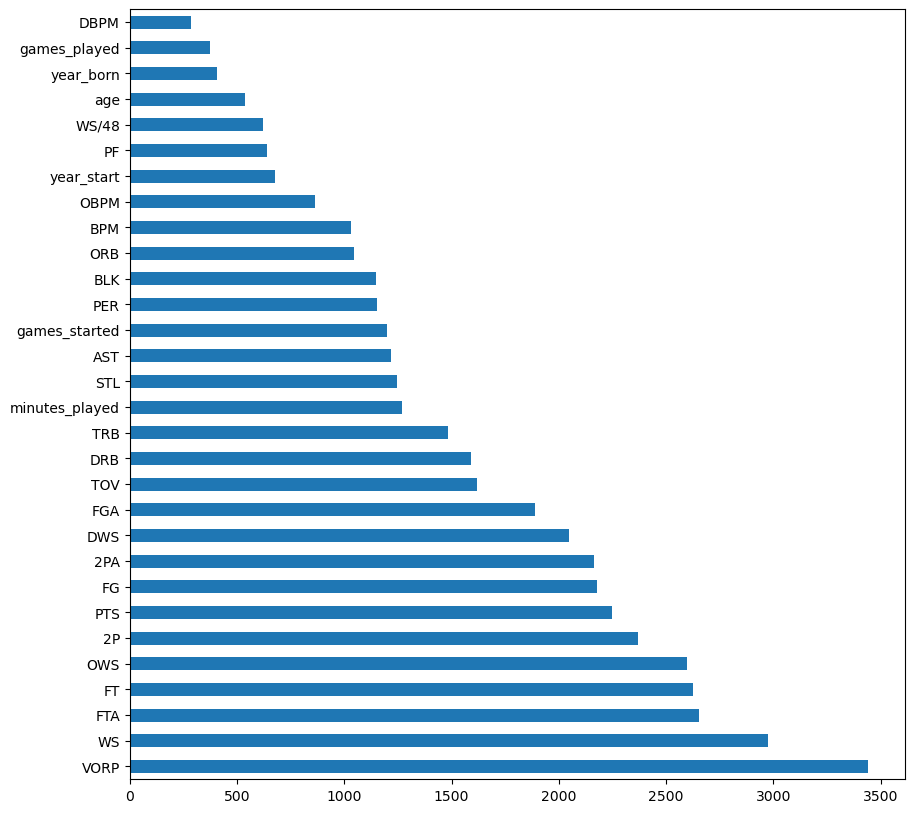

In [104]:
pd.Series(index=X.columns, data=my_KBest.scores_).sort_values(ascending=False).head(30).plot(kind='barh', figsize=(10,10))
plt.show()

In [105]:
cols_indx = my_KBest.get_support(True)
new_df = X.iloc[:, cols_indx]
new_df = pd.concat([df['name'], new_df, y], axis=1)
pd.set_option('display.max_columns', None)
new_df.head()

,name,age,games_played,games_started,minutes_played,PER,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_born,year_start,hall_of_fame
0,Zaid Abdul-Aziz,27.0,79,50,2459.0,15.9,3.3,3.2,6.5,0.126,-0.7,1.7,1.0,1.8,336.0,732.0,336.0,732.0,193.0,240.0,259.0,664.0,923.0,166.0,80.0,104.0,78.525194,227.0,865.0,1946,1969,0
1,Kareem Abdul-Jabbar,26.0,81,72,3548.0,24.4,10.6,7.9,18.4,0.250,4.9,3.6,8.5,9.4,948.0,1759.0,948.0,1759.0,295.0,420.0,287.0,891.0,1178.0,386.0,112.0,283.0,61.817947,238.0,2191.0,1947,1970,1
2,Don Adams,26.0,74,46,2298.0,10.9,0.1,3.5,3.6,0.076,-2.6,1.5,-1.1,0.5,303.0,742.0,303.0,742.0,153.0,201.0,133.0,315.0,448.0,141.0,110.0,12.0,61.516681,242.0,759.0,1947,1971,0
3,Rick Adelman,27.0,55,12,618.0,10.0,-0.3,0.9,0.7,0.053,-3.8,0.8,-3.0,-0.2,64.0,170.0,64.0,170.0,54.0,76.0,16.0,53.0,69.0,56.0,36.0,1.0,79.688357,63.0,182.0,1946,1969,0
4,Lucius Allen,26.0,72,48,2388.0,18.8,4.7,3.4,8.2,0.164,3.1,0.4,3.6,3.4,526.0,1062.0,526.0,1062.0,216.0,274.0,89.0,202.0,291.0,374.0,137.0,22.0,79.688357,215.0,1268.0,1947,1970,0


Now that we have that, let's create a dataframe where each row is a unique player.

In [106]:
unique_names = [name for name in new_df['name'].unique()]
delete_cols = ['age']
sum_cols = ['games_played', 'games_started', 'minutes_played', 'FG', 'FGA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB',
           'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
avg_cols = ['PER', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'year_born', 'year_start',
           'hall_of_fame']

final_df = pd.DataFrame(unique_names, columns=['name'])
final_df.head()

,name
0,Zaid Abdul-Aziz
1,Kareem Abdul-Jabbar
2,Don Adams
3,Rick Adelman
4,Lucius Allen


In [107]:
final_df.loc[final_df['name']=='Kareem Abdul-Jabbar', 'name']

1    Kareem Abdul-Jabbar
Name: name, dtype: object

In [108]:
for sum_col in sum_cols:
    final_df[sum_col] = None
    
for avg_col in avg_cols:
    final_df[avg_col] = None

In [109]:
final_df.head()

,name,games_played,games_started,minutes_played,FG,FGA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year_born,year_start,hall_of_fame
0,Zaid Abdul-Aziz,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Kareem Abdul-Jabbar,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Don Adams,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Rick Adelman,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Lucius Allen,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [110]:
temp_sum = new_df.loc[new_df['name']=='Kareem Abdul-Jabbar', avg_cols[0]].mean()
temp_sum

23.2375

In [111]:
for final_name in final_df['name']:
    for name in new_df['name']:
        
        if final_name==name:
            
            for sum_index in range(len(sum_cols)):
                temp_sum = new_df.loc[new_df['name']==final_name, sum_cols[sum_index]].sum() # Sum
                final_df.loc[final_df['name']==final_name, sum_cols[sum_index]] = temp_sum # Add sum to column at correct name
            
            for avg_index in range(len(avg_cols)):
                temp_avg = new_df.loc[new_df['name']==final_name, avg_cols[avg_index]].mean() # Average
                final_df.loc[final_df['name']==final_name, avg_cols[avg_index]] = temp_avg # Add avg to column at correct name
                
        else:
            pass
                

In [112]:
final_df.head()

,name,games_played,games_started,minutes_played,FG,FGA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year_born,year_start,hall_of_fame
0,Zaid Abdul-Aziz,225,91,4643.0,677.0,1539.0,677.0,1539.0,435.0,561.0,522.0,1155.0,1677.0,293.0,134.0,208.0,342.100775,463.0,1789.0,14.285714,0.785714,0.814286,1.614286,0.066857,-2.171429,-0.328571,-2.485714,0.271429,1946.0,1969.0,0.0
1,Kareem Abdul-Jabbar,1239,1116,43787.0,11695.0,20863.0,11694.0,20845.0,4925.0,6688.0,2975.0,9394.0,12369.0,4302.0,1160.0,3189.0,2774.271786,3667.0,28316.0,23.2375,7.5,4.38125,11.86875,0.202188,3.51875,1.825,5.33125,5.36875,1947.0,1970.0,1.0
2,Don Adams,258,122,6088.0,713.0,1753.0,713.0,1753.0,367.0,509.0,364.0,844.0,1208.0,439.0,283.0,55.0,246.066723,750.0,1793.0,10.025,-0.25,1.75,1.5,0.0405,-3.125,0.925,-2.2,0.05,1947.0,1971.0,0.0
3,Rick Adelman,171,53,2766.0,310.0,752.0,310.0,752.0,200.0,282.0,66.0,193.0,259.0,280.0,176.0,17.0,398.441786,265.0,820.0,10.72,0.02,0.64,0.66,0.0622,-3.0,0.44,-2.58,-0.06,1946.0,1969.0,0.0
4,Lucius Allen,466,291,14524.0,2923.0,6461.0,2923.0,6461.0,1277.0,1645.0,471.0,1116.0,1587.0,2284.0,740.0,153.0,725.130143,1305.0,7123.0,15.3125,1.775,1.525,3.3,0.075,0.6375,-0.7375,-0.05,1.1875,1947.0,1970.0,0.0


In [113]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3117 entries, 0 to 3116
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            3117 non-null   object
 1   games_played    3117 non-null   object
 2   games_started   3117 non-null   object
 3   minutes_played  3117 non-null   object
 4   FG              3117 non-null   object
 5   FGA             3117 non-null   object
 6   2P              3117 non-null   object
 7   2PA             3117 non-null   object
 8   FT              3117 non-null   object
 9   FTA             3117 non-null   object
 10  ORB             3117 non-null   object
 11  DRB             3117 non-null   object
 12  TRB             3117 non-null   object
 13  AST             3117 non-null   object
 14  STL             3117 non-null   object
 15  BLK             3117 non-null   object
 16  TOV             3117 non-null   object
 17  PF              3117 non-null   object
 18  PTS     

In [114]:
for col in final_df.drop(columns=['name']).columns:
    final_df[col] = final_df[col].astype('float')

In [115]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3117 entries, 0 to 3116
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            3117 non-null   object 
 1   games_played    3117 non-null   float64
 2   games_started   3117 non-null   float64
 3   minutes_played  3117 non-null   float64
 4   FG              3117 non-null   float64
 5   FGA             3117 non-null   float64
 6   2P              3117 non-null   float64
 7   2PA             3117 non-null   float64
 8   FT              3117 non-null   float64
 9   FTA             3117 non-null   float64
 10  ORB             3117 non-null   float64
 11  DRB             3117 non-null   float64
 12  TRB             3117 non-null   float64
 13  AST             3117 non-null   float64
 14  STL             3117 non-null   float64
 15  BLK             3117 non-null   float64
 16  TOV             3117 non-null   float64
 17  PF              3117 non-null   f

## Logistic Regression<a name="second-point"></a>

Let's run a simple logistic regression to get a baseline of model performance.

In [116]:
testing_df = final_df.copy()

In [117]:
X = testing_df.drop(columns=['hall_of_fame', 'name'])
y = testing_df['hall_of_fame']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
    
model = LogisticRegression()

model.fit(X_train, y_train)
    
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.974782209995415
0.9754273504273504


/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
train_acc = []
test_acc = []

for k in range(1, X.shape[1]):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_ss = scaler.transform(X_train)
    X_test_ss = scaler.transform(X_test)
    
    my_KBest = SelectKBest(k=k).fit(X_train_ss, y_train)
    
    X_train_selected = my_KBest.transform(X_train_ss)
    X_test_selected = my_KBest.transform(X_test_ss)
    
    model = LogisticRegression()
    model.fit(X_train_selected, y_train)
    
    train_acc.append(model.score(X_train_selected, y_train))
    test_acc.append(model.score(X_test_selected, y_test))

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


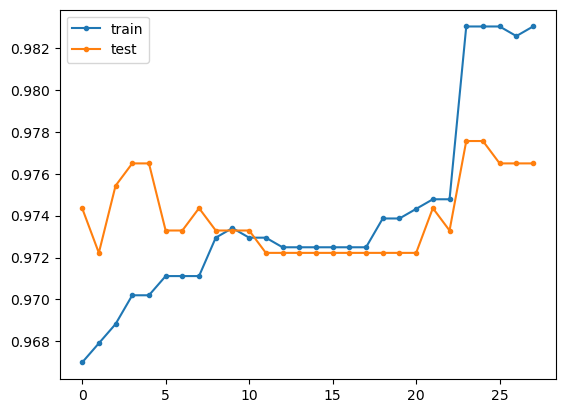

In [125]:
plt.figure()
plt.plot(train_acc, label='train', marker='.')
plt.plot(test_acc, label='test', marker='.')
plt.legend()
plt.show()

In [126]:
scaler = StandardScaler()
scaler.fit(X_train)
    
X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

my_KBest = SelectKBest(score_func=r_regression, k=5).fit(X_train, y_train)
    
X_train_selected = my_KBest.transform(X_train)
X_test_selected = my_KBest.transform(X_test)
    
model = LogisticRegression(max_iter=10000)
model.fit(X_train_selected, y_train)

print(model.score(X_test_selected, y_test))

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9754273504273504
0.9743589743589743


/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
final_df['hall_of_fame'].mean()

0.03208213025344883

This shows me that about 3.2% of players in my dataset are in the Hall of Fame. This means that 96.8% of players are not in the Hall of Fame. Therefore, scoring a 97.5% is slightly better than chance but we'd like to see better results. We will try using different pre-processing techniques to find a better solution.

There seems to be a jump in performance at 26 features. Even though we could reasonably go lower, to prevent overfitting, we will stick with 26 features.

In [128]:
my_KBest.scores_

array([ 0.22732978,  0.34025564,  0.31622339,  0.39226615,  0.37126792,
        0.41028313,  0.3975115 ,  0.41264775,  0.41488316,  0.31903626,
        0.35007146,  0.34480212,  0.30506184,  0.327314  ,  0.30693205,
        0.3479378 ,  0.27296999,  0.39150493,  0.22161185,  0.43487432,
        0.39432826,  0.45126334,  0.16896766,  0.20781785,  0.1241832 ,
        0.21632517,  0.47440532, -0.18553643, -0.21728439])

## PCA and Logistic Regression<a name="third-point"></a>

In [129]:
train_acc = []
test_acc = []

for compos in range(1, 30):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_ss = scaler.transform(X_train)
    X_test_ss = scaler.transform(X_test)
    
    my_pca = PCA(n_components=compos).fit(X_train_ss, y_train)
    
    X_train_selected = my_pca.transform(X_train_ss)
    X_test_selected = my_pca.transform(X_test_ss)
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_selected, y_train)
    
    train_acc.append(model.score(X_train_selected, y_train))
    test_acc.append(model.score(X_test_selected, y_test))

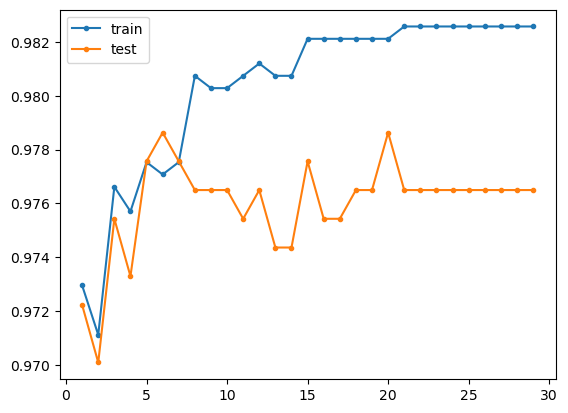

In [131]:
plt.figure()
plt.plot(range(1, 30), train_acc, label='train', marker='.')
plt.plot(range(1, 30), test_acc, label='test', marker='.')
plt.legend()
plt.show()

6 components seems to be our best model.

In [132]:
scaler = StandardScaler()
scaler.fit(X_train)
    
X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

my_pca = PCA(n_components=6).fit(X_train_ss, y_train)
    
X_train_selected = my_pca.transform(X_train_ss)
X_test_selected = my_pca.transform(X_test_ss)
    
model = LogisticRegression(max_iter=10000)
model.fit(X_train_selected, y_train)
    
print(model.score(X_train_selected, y_train))
print(model.score(X_test_selected, y_test))

0.9770747363594682
0.9786324786324786


We score about a 97.8% on this. A bit better using PCA instead of SelectKBest.

## Pipeline and Grid Searching<a name="fourth-point"></a>

We are going to take 20 players out of this dataframe altogether for testing our best model. We'll take 10 with positive hall of fame status (1) and 10 with negative hall of fame status (0).

In [28]:
temp_hof_df = testing_df.loc[testing_df['hall_of_fame']==1, :]
temp_hof_df

,name,games_played,games_started,minutes_played,FG,FGA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year_born,year_start,hall_of_fame
1,Kareem Abdul-Jabbar,1239.0,1116.0,43787.0,11695.0,20863.0,11694.0,20845.0,4925.0,6688.0,2975.0,9394.0,12369.0,4302.0,1160.0,3189.0,2774.271786,3667.0,28316.0,23.237500,7.500000,4.381250,11.868750,0.202188,3.518750,1.825000,5.331250,5.368750,1947.0,1970.0,1.0
5,Tiny Archibald,638.0,482.0,21339.0,3651.0,7916.0,3632.0,7831.0,2988.0,3709.0,344.0,1015.0,1359.0,4415.0,719.0,81.0,1441.753429,1379.0,10309.0,15.940000,3.620000,1.490000,5.120000,0.104700,1.460000,-2.160000,-0.730000,0.950000,1948.0,1971.0,1.0
10,Rick Barry,554.0,396.0,19585.0,4759.0,10595.0,4686.0,10374.0,2138.0,2334.0,510.0,2366.0,2876.0,3163.0,1104.0,269.0,820.066723,1464.0,11729.0,19.128571,5.242857,3.114286,8.342857,0.138429,2.828571,0.157143,2.971429,3.700000,1944.0,1966.0,1.0
14,Walt Bellamy,78.0,49.0,2454.0,391.0,803.0,391.0,803.0,235.0,385.0,264.0,481.0,745.0,189.0,52.0,48.0,123.635893,234.0,1017.0,15.800000,1.600000,1.100000,2.750000,0.164500,-1.450000,-2.700000,-4.150000,0.700000,1939.0,1962.0,1.0
16,Dave Bing,386.0,264.0,13063.0,2350.0,5319.0,2350.0,5319.0,1411.0,1756.0,418.0,741.0,1159.0,2232.0,483.0,89.0,534.753429,1097.0,6111.0,15.640000,3.020000,2.060000,5.080000,0.092600,1.480000,-1.060000,0.400000,1.720000,1943.0,1967.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,Tracy McGrady,968.0,727.0,31331.0,6800.0,15648.0,5703.0,12386.0,3929.0,5265.0,1322.0,4048.0,5370.0,4260.0,1151.0,821.0,2073.000000,1701.0,18626.0,19.505882,3.576471,2.152941,5.735294,0.121059,2.000000,0.388235,2.405882,2.970588,1979.0,1998.0,1.0
1828,Paul Pierce,1343.0,1285.0,45880.0,8668.0,19465.0,6525.0,13649.0,6918.0,8578.0,1092.0,6435.0,7527.0,4708.0,1752.0,745.0,3532.000000,3643.0,26397.0,18.557895,4.573684,3.331579,7.905263,0.145000,2.352632,0.368421,2.721053,3.231579,1977.0,1999.0,1.0
2058,Manu Ginobili,992.0,349.0,25560.0,4383.0,9799.0,2952.0,5936.0,3270.0,3958.0,666.0,2889.0,3555.0,3838.0,1349.0,303.0,2011.000000,2086.0,13467.0,20.293333,3.886667,3.066667,6.953333,0.191333,3.740000,1.253333,4.993333,3.133333,1977.0,2003.0,1.0
2076,Yao Ming,486.0,476.0,15818.0,3380.0,6445.0,3378.0,6435.0,2485.0,2984.0,1233.0,3261.0,4494.0,769.0,189.0,920.0,1311.000000,1596.0,9247.0,22.850000,4.587500,3.637500,8.250000,0.194750,0.087500,1.587500,1.650000,2.137500,1980.0,2003.0,1.0


In [29]:
temp_not_hof_df = testing_df.loc[testing_df['hall_of_fame']==0, :]
temp_not_hof_df

,name,games_played,games_started,minutes_played,FG,FGA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year_born,year_start,hall_of_fame
0,Zaid Abdul-Aziz,225.0,91.0,4643.0,677.0,1539.0,677.0,1539.0,435.0,561.0,522.0,1155.0,1677.0,293.0,134.0,208.0,342.100775,463.0,1789.0,14.285714,0.785714,0.814286,1.614286,0.066857,-2.171429,-0.328571,-2.485714,0.271429,1946.0,1969.0,0.0
2,Don Adams,258.0,122.0,6088.0,713.0,1753.0,713.0,1753.0,367.0,509.0,364.0,844.0,1208.0,439.0,283.0,55.0,246.066723,750.0,1793.0,10.025000,-0.250000,1.750000,1.500000,0.040500,-3.125000,0.925000,-2.200000,0.050000,1947.0,1971.0,0.0
3,Rick Adelman,171.0,53.0,2766.0,310.0,752.0,310.0,752.0,200.0,282.0,66.0,193.0,259.0,280.0,176.0,17.0,398.441786,265.0,820.0,10.720000,0.020000,0.640000,0.660000,0.062200,-3.000000,0.440000,-2.580000,-0.060000,1946.0,1969.0,0.0
4,Lucius Allen,466.0,291.0,14524.0,2923.0,6461.0,2923.0,6461.0,1277.0,1645.0,471.0,1116.0,1587.0,2284.0,740.0,153.0,725.130143,1305.0,7123.0,15.312500,1.775000,1.525000,3.300000,0.075000,0.637500,-0.737500,-0.050000,1.187500,1947.0,1970.0,0.0
6,Dennis Awtrey,586.0,224.0,11132.0,982.0,2168.0,982.0,2168.0,554.0,824.0,745.0,1623.0,2368.0,1172.0,202.0,195.0,544.271786,1222.0,2518.0,7.900000,0.272727,0.990909,1.290909,0.047909,-3.109091,0.945455,-2.145455,0.200000,1948.0,1971.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,Troy Williams,60.0,32.0,1114.0,146.0,334.0,110.0,210.0,42.0,64.0,30.0,108.0,138.0,50.0,54.0,20.0,66.000000,120.0,370.0,9.766667,-0.266667,0.466667,0.200000,0.049000,-2.566667,0.066667,-2.500000,-0.066667,1969.0,2017.0,0.0
3113,Kyle Wiltjer,14.0,0.0,44.0,4.0,14.0,0.0,1.0,1.0,2.0,4.0,6.0,10.0,2.0,3.0,1.0,5.000000,4.0,13.0,6.700000,-0.100000,0.100000,0.000000,-0.039000,-4.000000,0.000000,-4.000000,0.000000,1992.0,2017.0,0.0
3114,Stephen Zimmerman,19.0,0.0,108.0,10.0,31.0,10.0,31.0,3.0,5.0,11.0,24.0,35.0,4.0,2.0,5.0,3.000000,17.0,23.0,7.300000,-0.100000,0.100000,0.000000,-0.005000,-7.800000,0.400000,-7.300000,-0.100000,1996.0,2017.0,0.0
3115,Paul Zipser,44.0,18.0,843.0,88.0,221.0,55.0,122.0,31.0,40.0,15.0,110.0,125.0,36.0,15.0,16.0,40.000000,78.0,240.0,6.900000,-0.300000,0.800000,0.500000,0.030000,-3.600000,-0.100000,-3.700000,-0.400000,1994.0,2017.0,0.0


In [30]:
hof_index_list = []
not_hof_index_list = []

for i in range(10):
    rand_hof_num = np.random.choice(temp_hof_df.index.to_list())
    rand_not_hof_num = np.random.choice(temp_not_hof_df.index.to_list())
    
    hof_index_list.append(rand_hof_num)
    not_hof_index_list.append(rand_not_hof_num)
    

In [31]:
print(hof_index_list)
print(not_hof_index_list)

[353, 1211, 579, 2058, 372, 416, 1733, 221, 875, 387]
[2536, 345, 1695, 1121, 2049, 2102, 265, 2550, 1410, 2880]


In [32]:
untouched_index_list = hof_index_list + not_hof_index_list

untouched_test_set = testing_df.iloc[untouched_index_list]
untouched_test_set

,name,games_played,games_started,minutes_played,FG,FGA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year_born,year_start,hall_of_fame
353,Julius Erving,836.0,722.0,28677.0,7237.0,14276.0,7191.0,14100.0,3844.0,4950.0,2067.0,3534.0,5601.0,3224.0,1508.0,1293.0,2414.585227,2286.0,18364.0,21.772727,5.645455,4.027273,9.645455,0.174455,3.327273,1.654545,4.981818,4.690909,1950.0,1972.0,1.0
1211,Sarunas Marciulionis,363.0,30.0,8123.0,1571.0,3109.0,1444.0,2765.0,1362.0,1773.0,292.0,527.0,819.0,807.0,459.0,31.0,715.000000,971.0,4631.0,15.714286,2.071429,0.771429,2.871429,0.095571,0.671429,-1.585714,-0.885714,0.528571,1964.0,1990.0,1.0
579,Sidney Moncrief,767.0,593.0,23150.0,4117.0,8198.0,4007.0,7811.0,3587.0,4319.0,1424.0,2151.0,3575.0,2793.0,924.0,228.0,1551.000000,1635.0,11931.0,17.745455,5.581818,2.627273,8.218182,0.173091,2.709091,0.363636,3.072727,3.081818,1957.0,1980.0,1.0
2058,Manu Ginobili,992.0,349.0,25560.0,4383.0,9799.0,2952.0,5936.0,3270.0,3958.0,666.0,2889.0,3555.0,3838.0,1349.0,303.0,2011.000000,2086.0,13467.0,20.293333,3.886667,3.066667,6.953333,0.191333,3.740000,1.253333,4.993333,3.133333,1977.0,2003.0,1.0
372,Bobby Jones,774.0,351.0,20177.0,3412.0,6199.0,3412.0,6183.0,2087.0,2674.0,1288.0,2968.0,4256.0,1888.0,1050.0,982.0,1278.516681,2104.0,8911.0,17.560000,4.000000,3.370000,7.350000,0.171700,1.510000,2.590000,4.100000,3.220000,1951.0,1975.0,1.0
416,David Thompson,509.0,323.0,16305.0,4213.0,8365.0,4190.0,8282.0,2815.0,3616.0,737.0,1184.0,1921.0,1631.0,459.0,407.0,1208.545171,1287.0,11264.0,19.375000,5.062500,1.300000,6.337500,0.140125,2.275000,-1.962500,0.325000,1.587500,1954.0,1976.0,1.0
1733,Tim Duncan,1392.0,1389.0,47368.0,10285.0,20334.0,10255.0,20166.0,5896.0,8468.0,3859.0,11232.0,15091.0,4225.0,1025.0,3020.0,3381.000000,3304.0,26496.0,23.931579,5.263158,5.600000,10.857895,0.206105,1.257895,4.031579,5.278947,4.705263,1976.0,1998.0,1.0
221,Zelmo Beaty,69.0,24.0,1213.0,136.0,310.0,136.0,310.0,108.0,135.0,93.0,234.0,327.0,74.0,45.0,29.0,61.817947,130.0,380.0,12.800000,1.100000,1.200000,2.300000,0.091000,-2.700000,0.400000,-2.300000,-0.100000,1939.0,1963.0,1.0
875,Michael Jordan,1072.0,1039.0,41011.0,12192.0,24537.0,11611.0,22759.0,7327.0,8772.0,1668.0,5004.0,6672.0,5633.0,2514.0,893.0,2924.000000,2783.0,32292.0,27.373333,9.993333,4.280000,14.260000,0.236600,6.453333,0.966667,7.460000,6.966667,1963.0,1985.0,1.0
387,Moses Malone,1411.0,1126.0,47577.0,9824.0,20035.0,9816.0,19955.0,8836.0,11530.0,7168.0,10116.0,17284.0,1885.0,1156.0,1914.0,4039.575581,3351.0,28492.0,20.114286,5.619048,2.757143,8.371429,0.154714,0.961905,-0.666667,0.290476,2.204762,1955.0,1975.0,1.0


In [33]:
X = testing_df.drop(columns=['hall_of_fame', 'name'], index=untouched_index_list)
y = testing_df['hall_of_fame'].drop(index=untouched_index_list)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [34]:
estimators = [('scaler', StandardScaler()),
             ('reduce_dim', PCA()),
             ('model', LogisticRegression())]

pipe = Pipeline(estimators)

In [35]:
params = [
    {'scaler': [StandardScaler(), MinMaxScaler()],
     'reduce_dim': [PCA()],
     'reduce_dim__n_components': range(1, 19),
     'model': [LogisticRegression()],
     'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }, 
    
    {'scaler': [StandardScaler(), MinMaxScaler()],
     'reduce_dim': [SelectKBest()],
     'reduce_dim__k': range(1, 19),
     'model': [LogisticRegression()],
     'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    
    {'scaler': [StandardScaler(), MinMaxScaler()],
     'reduce_dim': [PCA()],
     'reduce_dim__n_components': range(1, 19),
     'model': [DecisionTreeClassifier()],
     'model__max_depth': range(2, 5)
    },
    
    {'scaler': [StandardScaler(), MinMaxScaler()],
     'reduce_dim': [SelectKBest()],
     'reduce_dim__k': range(1, 19),
     'model': [DecisionTreeClassifier()],
     'model__max_depth': range(2, 5)
    },
    
    {'scaler': [StandardScaler(), MinMaxScaler()],
     'reduce_dim': [PCA()],
     'reduce_dim__n_components': range(1, 19),
     'model': [SVC()],
     'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
     'model__kernel': ['rbf', 'poly']
    },
    
    {'scaler': [StandardScaler(), MinMaxScaler()],
     'reduce_dim': [SelectKBest()],
     'reduce_dim__k': range(1, 19),
     'model': [SVC()],
     'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
     'model__kernel': ['rbf', 'poly']
    }
]

In [36]:
grid = GridSearchCV(pipe, params, cv=5, n_jobs=8)
fittedgrid = grid.fit(X_train, y_train)

fittedgrid.best_params_

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also r

/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidenbailey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

{'model': LogisticRegression(C=1000),
 'model__C': 1000,
 'reduce_dim': PCA(n_components=14),
 'reduce_dim__n_components': 14,
 'scaler': MinMaxScaler()}

In [37]:
#1. Scale
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#2. Feature engineering
my_pca = PCA(n_components=4)
my_pca.fit(X_train_scaled, y_train)

X_train_selected = my_pca.transform(X_train_scaled)
X_test_selected = my_pca.transform(X_test_scaled)

#3. Instantiate model
my_svc = SVC(C=1, kernel='poly')
my_svc.fit(X_train_selected, y_train)

#4. CV=5 Validation
cv_score = np.mean(cross_val_score(my_svc, X_train_selected, y_train, cv=5))
print(cv_score)

print(f'Train score: {my_svc.score(X_train_selected, y_train)}')
print(f'Test score: {my_svc.score(X_test_selected, y_test)}')

0.9802191267513848
Train score: 0.985062575696407
Test score: 0.9790322580645161


In [38]:
train_acc = []
test_acc = []

for components in range(1, 20):
    #1. Scale
    scaler = MinMaxScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #2. Feature engineering
    my_pca = PCA(n_components=components)
    my_pca.fit(X_train_scaled, y_train)

    X_train_selected = my_pca.transform(X_train_scaled)
    X_test_selected = my_pca.transform(X_test_scaled)

    #3. Instantiate model
    my_scv = SVC(C=1, kernel='poly')
    my_scv.fit(X_train_selected, y_train)
    
    train_val = my_scv.score(X_train_selected, y_train)
    test_val = my_scv.score(X_test_selected, y_test)
    
    train_acc.append(train_val)
    test_acc.append(test_val)

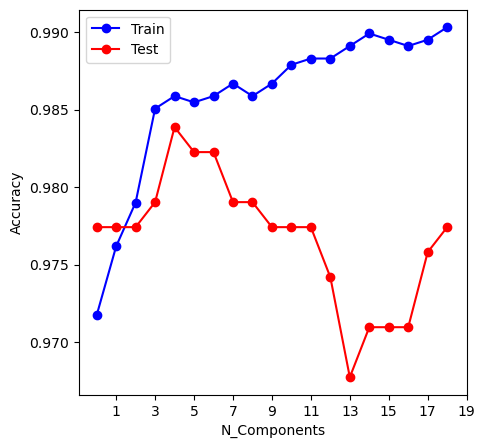

In [39]:
plt.figure(figsize=(5,5))
plt.plot(train_acc, c='blue', label='Train', marker='o')
plt.plot(test_acc, c='red', label='Test', marker='o')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('N_Components')
plt.xticks(ticks=range(1, 20, 2))
plt.show()

In [73]:
train_acc = []
test_acc = []
c_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c_val in c_range:
    #1. Scale
    scaler = MinMaxScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #2. Feature engineering
    my_pca = PCA(n_components=5)
    my_pca.fit(X_train_scaled, y_train)

    X_train_selected = my_pca.transform(X_train_scaled)
    X_test_selected = my_pca.transform(X_test_scaled)

    #3. Instantiate model
    my_scv = SVC(C=c_val, kernel='poly')
    my_scv.fit(X_train_selected, y_train)
    
    train_val = my_scv.score(X_train_selected, y_train)
    test_val = my_scv.score(X_test_selected, y_test)
    
    train_acc.append(train_val)
    test_acc.append(test_val)

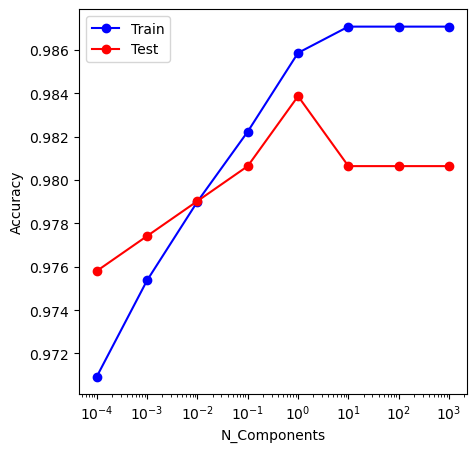

In [74]:
plt.figure(figsize=(5,5))
plt.plot(c_range, train_acc, c='blue', label='Train', marker='o')
plt.plot(c_range, test_acc, c='red', label='Test', marker='o')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('N_Components')
plt.xticks(ticks=range(1, 20, 2))
plt.xscale('log')
plt.show()

n_components = 5 seems to be the best with c = 1, so we'll go with that.

In [75]:
#1. Scale
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#2. Feature engineering
my_pca = PCA(n_components=5)
my_pca.fit(X_train_scaled, y_train)

X_train_selected = my_pca.transform(X_train_scaled)
X_test_selected = my_pca.transform(X_test_scaled)

#3. Instantiate model
my_svc = SVC(C=1, kernel='poly', probability=True)
my_svc.fit(X_train_selected, y_train)

#4. CV=5 Validation
cv_score = np.mean(cross_val_score(my_svc, X_train_selected, y_train, cv=5))
print(f'CV score: {cv_score}')

print(f'Train score: {my_svc.score(X_train_selected, y_train)}')
print(f'Test score: {my_svc.score(X_test_selected, y_test)}')

CV score: 0.9790070055392637
Train score: 0.9858700040371418
Test score: 0.9838709677419355


This is our best performing model yet at 98.4% accuracy for our test set. Let's test the points we set aside to see how it does.

## Model Evaluation<a name="fifth-point"></a>

Now, let's evaluate our model.

In [76]:
pred_rows = testing_df.iloc[untouched_index_list].drop(columns=['name', 'hall_of_fame'])

In [77]:
pred_scaled = scaler.transform(pred_rows)

pred_pca = my_pca.transform(pred_scaled)

predictions = my_svc.predict(pred_pca)

In [78]:
pred_df = testing_df.iloc[untouched_index_list]

In [79]:
pred_df['predictions'] = predictions

/var/folders/s_/j3ydldlx0dq_zfvvm27bphpr0000gn/T/ipykernel_47927/824251956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['predictions'] = predictions


In [80]:
pred_df = pred_df[['name', 'hall_of_fame', 'predictions']]
pred_df

,name,hall_of_fame,predictions
353,Julius Erving,1.0,1.0
1211,Sarunas Marciulionis,1.0,0.0
579,Sidney Moncrief,1.0,0.0
2058,Manu Ginobili,1.0,0.0
372,Bobby Jones,1.0,0.0
416,David Thompson,1.0,0.0
1733,Tim Duncan,1.0,1.0
221,Zelmo Beaty,1.0,0.0
875,Michael Jordan,1.0,1.0
387,Moses Malone,1.0,1.0


This looks pretty weak overall with half of the hall of fame players being incorrectly identified as non-hall of fame players. This could indicate low recall score.

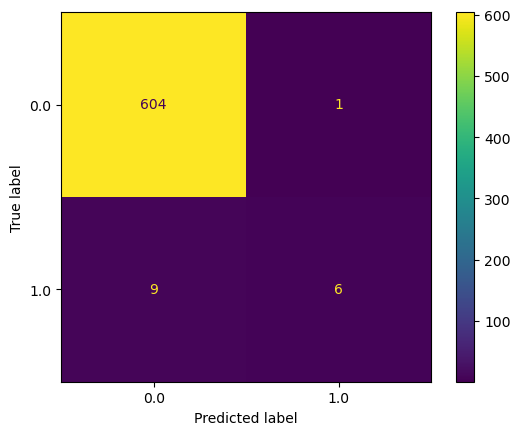

In [81]:
ConfusionMatrixDisplay.from_estimator(my_svc, X_test_selected, y_test);

In [82]:
pred_test = my_svc.predict(X_test_selected)

report_initial = classification_report(y_test, pred_test)
print(report_initial)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       605
         1.0       0.86      0.40      0.55        15

    accuracy                           0.98       620
   macro avg       0.92      0.70      0.77       620
weighted avg       0.98      0.98      0.98       620



This is a low recall and precision score. We really would like to see recall go up. Let's change the thresholds to see if that helps these results. We're willing to sacrifice some precision (althought not too much).

In [60]:
prob_pred = my_svc.predict_proba(pred_pca)

prob_pred

array([[5.29834250e-10, 9.99999999e-01],
       [9.93123663e-01, 6.87633670e-03],
       [4.53098036e-01, 5.46901964e-01],
       [9.94081041e-01, 5.91895919e-03],
       [5.96805322e-01, 4.03194678e-01],
       [7.16481353e-01, 2.83518647e-01],
       [2.71668845e-02, 9.72833115e-01],
       [8.45253274e-01, 1.54746726e-01],
       [3.00000090e-14, 1.00000000e+00],
       [6.20006242e-08, 9.99999938e-01],
       [9.96710749e-01, 3.28925086e-03],
       [9.84199682e-01, 1.58003176e-02],
       [9.94010207e-01, 5.98979296e-03],
       [9.93461261e-01, 6.53873922e-03],
       [9.93797481e-01, 6.20251897e-03],
       [9.93434973e-01, 6.56502679e-03],
       [9.88592863e-01, 1.14071374e-02],
       [9.93814616e-01, 6.18538418e-03],
       [9.87951514e-01, 1.20484858e-02],
       [9.97710382e-01, 2.28961793e-03]])

In [64]:
pred_df['prob_predictions'] = [options[1] for options in prob_pred]

In [65]:
pred_df

,name,hall_of_fame,predictions,prob_predictions
353,Julius Erving,1.0,1.0,1.000000
1211,Sarunas Marciulionis,1.0,0.0,0.006876
579,Sidney Moncrief,1.0,1.0,0.546902
2058,Manu Ginobili,1.0,0.0,0.005919
372,Bobby Jones,1.0,0.0,0.403195
416,David Thompson,1.0,0.0,0.283519
1733,Tim Duncan,1.0,1.0,0.972833
221,Zelmo Beaty,1.0,0.0,0.154747
875,Michael Jordan,1.0,1.0,1.000000
387,Moses Malone,1.0,1.0,1.000000


In [68]:
pred_df['from_prob_hard_predictions'] = [1 if num>=0.2 else 0 for num in pred_df['prob_predictions']]

In [69]:
pred_df

,name,hall_of_fame,predictions,prob_predictions,from_prob_hard_predictions
353,Julius Erving,1.0,1.0,1.000000,1
1211,Sarunas Marciulionis,1.0,0.0,0.006876,0
579,Sidney Moncrief,1.0,1.0,0.546902,1
2058,Manu Ginobili,1.0,0.0,0.005919,0
372,Bobby Jones,1.0,0.0,0.403195,1
416,David Thompson,1.0,0.0,0.283519,1
1733,Tim Duncan,1.0,1.0,0.972833,1
221,Zelmo Beaty,1.0,0.0,0.154747,0
875,Michael Jordan,1.0,1.0,1.000000,1
387,Moses Malone,1.0,1.0,1.000000,1


Looks better on this separate test set. Let's try it on the big test set and see how it impacts precision and recall.

In [84]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [94]:
y_proba = my_svc.predict_proba(X_test_selected)[:, 1]

thresh_range = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

precision_scores = []
recall_scores = []

for threshold in thresh_range:
    y_threshold = np.where(y_proba >= threshold, 1, 0)
    
    precision_scores.append(precision_score(y_test, y_threshold))
    recall_scores.append(recall_score(y_test, y_threshold))

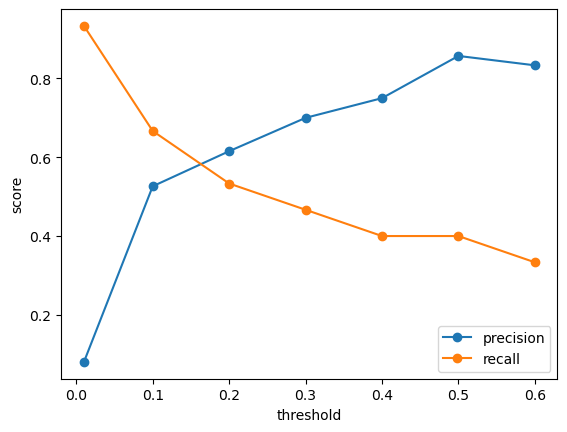

In [95]:
# Visualize the result
plt.figure()
plt.plot(thresh_range, precision_scores, label='precision', marker='o')
plt.plot(thresh_range, recall_scores, label='recall', marker='o')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

Here we see the tradeoff of changing our threshold.

Recall is just under 0.7 at a threshold of 0.1, which isn't great, and sacrifices precision quite a bit. Obviously, at the threshold 0.01, recall is really high, nearly 0.9, while precision is close to 0. Recall takes a pretty steep dive as precision goes up.

I believe precision is our more valuable indicator, and I believe we should leave the threshold at 0.5. If we have high recall and low precision, that means we'll be predicting most players that are hall of fame players when they are in fact hall of fame players. However, that means we will also be predicting many players to also be hall of fame players when in fact they are not. The value of this model is in helping us predict what makes players great. If our model catches a high number of non-hall of fame players, it loses that value. Therefore, I'm willing to incorrectly leave out some hall of fame players as being correctly predicted, knowing that those who were predicted are almost certainly actually in the hall of fame.

This also makes sense because there are some players that get inducted into the hall of fame for unique reasons or are outliers. Therefore, having a low recall score will likely always be a problem.

## Conclusion<a name="sixth-point"></a>

Overall, our model does what we need it to do. Its accuracy of 98.4% is better than chance. The precision is high at the expense of recall.

The limitations of this model (and any model most likely) is the inconsistency of why players are inducted into the hall of fame. Some on their in-game play, some simply on winning many championships, some on being the first to do something, and the list goes on. Since our goal was to help teams figure out what makes players successful on the court, I believe we achieved what we desired. 

We will miss some players in our predictions, but we can be confident that those we predict as hall of fame caliber are almost certainly that. Therefore, we can examine what makes these players successful and translate that into recruiting and building up players to be successful with their teams.